In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns

In [2]:
df = pd.read_json("C:\\Users\\Priyank\\Sarcasm_Headlines_Dataset_v2.json",lines=True)

In [3]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [5]:
df.isnull().any()

is_sarcastic    False
headline        False
article_link    False
dtype: bool

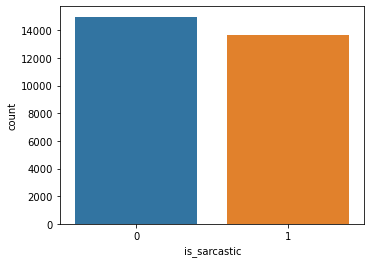

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(df['is_sarcastic'])

In [7]:
df = df.drop(['article_link'],axis=1)
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [8]:
#Importing library for NLP
import nltk
import re
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0,df.shape[0]):
    
    #this will clean special characters from the string
    Sarcasm = re.sub(pattern='[^a-zA-Z]',repl=' ',string=df.headline[i])
    
    #this will convert the string in lower case
    Sarcasm = Sarcasm.lower()
    
    #this will split the string
    Sarcasm = Sarcasm.split()
    
    #creating PorterStemmer to convert any word into it's root word
    ps = PorterStemmer()
    
    #Stopwords will remove commonly used english words for the string
    Sarcasm = [ps.stem(words) for words in Sarcasm if not words in set (stopwords.words('english'))]
    
    #Eventually joining back the string
    Sarcasm = ' '.join(Sarcasm)
    
    #Storing it in the corpus
    corpus.append(Sarcasm)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
corpus[0:10]

['thirtysometh scientist unveil doomsday clock hair loss',
 'dem rep total nail congress fall short gender racial equal',
 'eat veggi delici differ recip',
 'inclement weather prevent liar get work',
 'mother come pretti close use word stream correctli',
 'white inherit',
 'way file tax less stress',
 'richard branson global warm donat nearli much cost fail balloon trip',
 'shadow govern get larg meet marriott confer room b',
 'lot parent know scenario']

In [10]:
#Create Bag of wrods
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

#Extract Dependent variables
y = pd.get_dummies(df['is_sarcastic'])
y = y.iloc[:, 1].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
#Fit training data in Naive Bayes 
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,y_train)

BernoulliNB()

In [14]:
#Make Predictions on test data
y_pred = classifier.predict(X_test)

In [15]:
#Create comfusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)

Text(69.0, 0.5, 'Actual values')

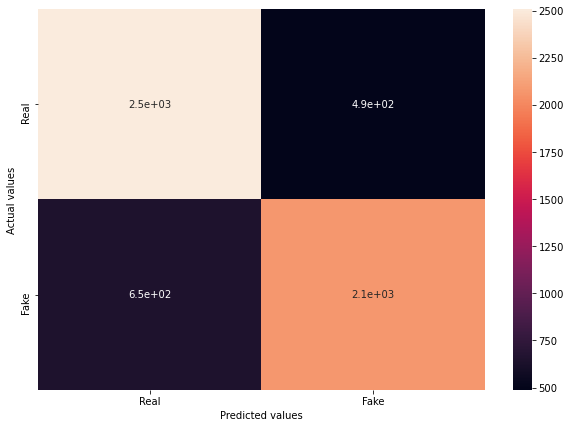

In [16]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [17]:
# Hyperparameter tuning the Naive Bayes Classifier
score = accuracy_score(y_test, y_pred)
print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))

Accuracy score for alpha=28618 is: 80.1%
